# SVD: Setting a threshold
Natalia Vélez, July 2020

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('talk')

Load singular values:

In [2]:
s = np.loadtxt('outputs/svd/s.txt')
s.shape

(2805,)

Cumulative sum of singular values:

90% variance explained: 237
95% variance explained: 313
99% variance explained: 524


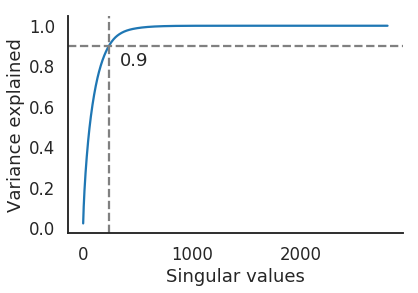

In [59]:
var_exp = np.cumsum(s)/np.sum(s)
var_thresh = [.9, .95, .99]
var_n = [np.argmax(var_exp > t) for t in var_thresh]

for t,n in zip(var_thresh,var_n):
    print('%i%% variance explained: %i' % (t*100, n) )

ax = plt.plot(var_exp)
plt.xlabel('Singular values')
plt.ylabel('Variance explained')
plt.axhline(.9, linestyle='--', color='gray')
plt.axvline(var_n[0], linestyle='--', color='gray')
plt.text(var_n[0]+100, .8, '0.9', size=18)
sns.despine()

Heuristic approach: Finding the "elbow"

In [65]:
np.max(s)

9884307796.43809

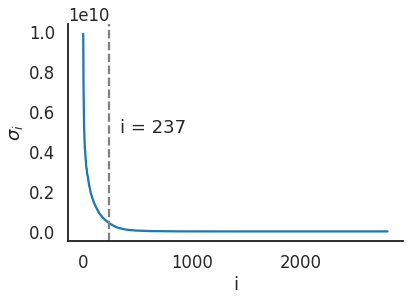

In [68]:
plt.plot(s)
plt.axvline(var_n[0], linestyle='--', color='gray')
plt.xlabel('i')
plt.ylabel('$\sigma_i$')
plt.text(var_n[0]+100, np.max(s)/2, 'i = %i' % var_n[0], size=18)
sns.despine()

**Conclusion: Truncating SVD outputs at r = 237**

Testing out code for truncation for next step:

In [78]:
test = np.array([[(i*j) for i in range(1,11)] for j in range(1,11)])
trunc = test[:,:5]
print(test)
print(trunc)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]
 [ 6 12 18 24 30]
 [ 7 14 21 28 35]
 [ 8 16 24 32 40]
 [ 9 18 27 36 45]
 [10 20 30 40 50]]
